In [18]:
import imageio

In [1]:
#define SOM class and functions
%run main_class.ipynb

In [2]:
#set random seed for reproducability
s = 0
seed = np.random.seed(s)

# Example: Random clusters of 2D data

In [3]:
def generate_blobs(N_blobs, N_points, s):
    
    """
    This function returns N_points observations, where each observation is an x,y coordinate corresponding to N_blobs groups.
    N_blobs: int; number of general clusters
    N_points: int; number of points (observations)
    s: int; random seed
    
    """
    
    np.random.seed(s)
    
    x = np.zeros(N_points)
    y = np.zeros(N_points)
    
    start = 0
    for blob in range(N_blobs):
        N_points_this_blob = int(np.floor(N_points/N_blobs))
        if blob == N_blobs-1:
            N_points_this_blob += np.mod(N_points, N_blobs)
            
        fin = start + N_points_this_blob
        x[start:fin] = np.random.random(1)*2
        y[start:fin] = np.random.random(1)*2
        start = fin
        
    scale = 0.05*N_blobs / (N_blobs - 1)
        
    noise_x = np.random.normal(size = N_points, scale = scale)
    noise_y = np.random.normal(size = N_points, scale = scale)
    
    x += noise_x
    y += noise_y
    
    x = (x - np.mean(x)) / np.std(x)
    y = (y - np.mean(y)) / np.std(y)
    
    return x,y

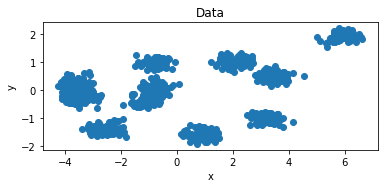

In [4]:
#generate and visualize data

x,y = generate_blobs(12,1000,s=3)
x *= 3 #scale in x-direction
obs = np.vstack([x,y]).T #all observations: row = observation, column = dimension

fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Data')
ax.set_aspect('equal')

In [10]:
#make and train the self-organizing map

#define constants
Nx = 5
Ny = 5
N_nodes = Nx*Ny
N_obs = np.shape(obs)[0] #number of observations 
N_dims = np.shape(obs)[1] #number of dimensions per observation
learning_rate = 1e-2
N_epochs = 100
colours_list = 'pink_blue_red_purple'
colours_list = 'pinks'
colours_list = 'default2'

#initialize
som = SOM(Nx, Ny, obs, N_epochs, linewidth = 4, colours_list = colours_list)
som.initialize_map(node_shape = 'hex')

#train
som.train_map(learning_rate)
z = som.z
z_epochs = som.z_epochs
bmus = BMUs(som)
freq = BMU_frequency(som)
dummy,bmus_colours = colourmap_2D(colours_list = colours_list, Nx = Nx, Ny = Ny)
QE = som.QE()
TE = som.TE()

In [11]:
QE,TE

(0.28544538016561954, 0.10399999999999998)

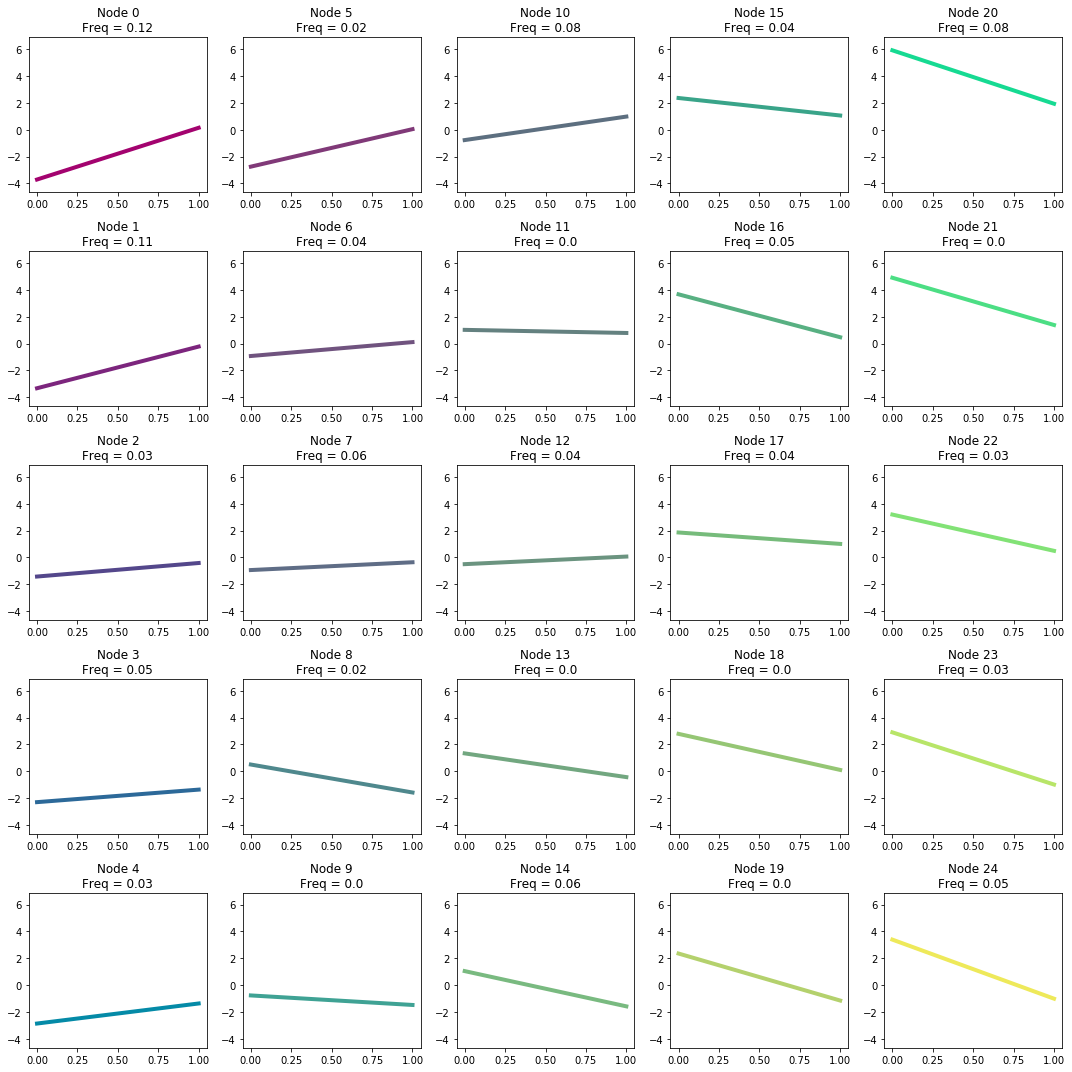

In [12]:
#visualize the SOM in map-space
fig, axes = som.plot()

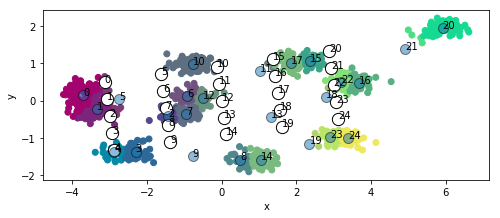

In [15]:
#visualize data, clusters, and map nodes in data-space

fig, ax = plt.subplots(figsize = (8,6))

ax.scatter(obs[:,0],obs[:,1], c = bmus_colours[bmus,:]) #observations, coloured by BMU
ax.scatter(z_epochs[:,0,0],z_epochs[:,1,0], s = 150, edgecolor = 'k', facecolor = 'w') #intial SOM nodes
ax.scatter(z_epochs[:,0,-1],z_epochs[:,1,-1], edgecolor = 'k', s = 100, alpha = 0.5) #final SOM nodes
ax.set_aspect('equal') #set distance in x- and y- directions to be the same visually
ax.set_xlabel('x') 
ax.set_ylabel('y')


#below: label node numbers to see which nodes are which

x = z_epochs[:,0,0]
y = z_epochs[:,1,0]
s = np.array([str(kk) for kk in range(N_nodes)])
for kk in range(N_nodes):
    ax.text(x = x[kk], y = y[kk], s = s[kk])
    
x = z_epochs[:,0,-1]
y = z_epochs[:,1,-1]
s = np.array([str(kk) for kk in range(N_nodes)])
for kk in range(N_nodes):
    ax.text(x = x[kk], y = y[kk], s = s[kk])

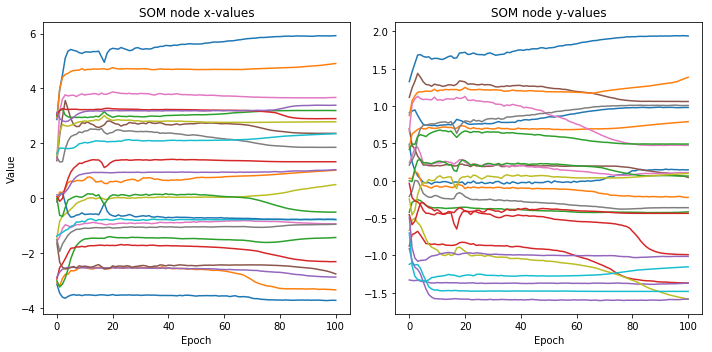

In [16]:
#visualize how som nodes in data-space change through training -- when these stabalize, it is a sign that the map has converged

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

for node in range(N_nodes):
    ax[0].plot(som.z_epochs[node,0,:].T)
    ax[1].plot(som.z_epochs[node,1,:].T, label = 'Node ' + str(node))

ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')
ax[0].set_ylabel('Value')
ax[0].set_title('SOM node x-values')
ax[1].set_title('SOM node y-values')
# ax[1].legend(fontsize = 9)

plt.tight_layout()
plt.show()

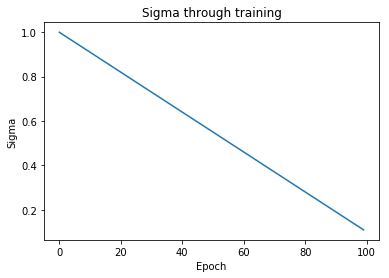

In [17]:
#visualize how sigma varies through time

fig, ax = plt.subplots()

ax.plot(som.sigmas)
ax.set_xlabel('Epoch')
ax.set_ylabel('Sigma')
ax.set_title('Sigma through training')

plt.show()

### GIF of training

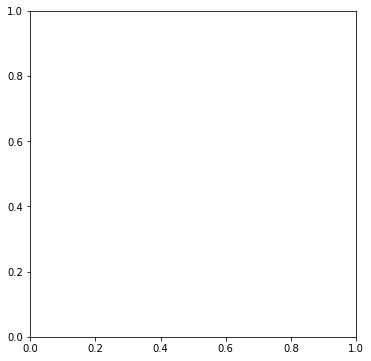

In [25]:
fig, ax = plt.subplots(figsize = (8,6))

filenames = []

for epoch in range(N_epochs):

    ax.scatter(obs[:,0],obs[:,1], c = bmus_colours[bmus,:]) #observations, coloured by BMU
    ax.scatter(z_epochs[:,0,epoch],z_epochs[:,1,epoch], s = 150, edgecolor = 'k', facecolor = 'w') #SOM nodes
    ax.set_aspect('equal') #set distance in x- and y- directions to be the same visually
    ax.set_xlabel('x') 
    ax.set_ylabel('y')

    #below: label node numbers to see which nodes are which

    x = z_epochs[:,0,epoch]
    y = z_epochs[:,1,epoch]
    s = np.array([str(kk) for kk in range(N_nodes)])
    for kk in range(N_nodes):
        ax.text(x = x[kk], y = y[kk], s = s[kk])        
        
    filename = 'epoch_' + str(epoch) + '.png'
    filenames.append(filename)

    plt.savefig('./gif_random/'+filename, bbox_inches = 'tight')

    ax.clear()

In [27]:
#save as a gif
with imageio.get_writer('./gif_random/som_random.gif', mode = 'I') as writer:
  for kk, filename in enumerate(filenames):
    if np.mod(kk,2)==0:
      image = imageio.imread('./gif_random/'+filename)
      writer.append_data(image)

# # If you want to remove files
# for filename in set(filenames):
#   os.remove(filename)